In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pandas import DataFrame
from itertools import cycle, islice
from matplotlib.colors import ListedColormap
from pandas.plotting import table

In [15]:
dtypes_dict = {'advertiser_id':'category', 'action_id': np.float64, 'source_id': np.int8, \
                'country_code': np.int64, 'latitude': np.float64, 'longitude': np.float64, 'wifi_connection': bool, \
                'carrier_id': np.float16, 'os_minor': np.float32, 'os_major': np.float32, 'agent_device': np.float64, \
                'specs_brand': 'category', 'brand': np.float16, 'timeToClick': np.float64, 'touchX': np.float16, \
                'touchY': np.float16, 'ref_type': 'category', 'ref_hash': np.int64}

clicks = pd.read_csv('data/clicks.csv.gzip', dtype=dtypes_dict, parse_dates=['created'])

dtypes_dict = {'created':'str', 'application_id': 'category', 'ref_type': 'category', 'device_brand': np.float32, \
                'device_countrycode': 'category', 'device_languaje': 'category'}

installs = pd.read_csv('data/installs.csv.gzip', dtype=dtypes_dict, parse_dates=['created'])
installs.drop('click_hash', axis=1, inplace=True) # Elimino esta columna por tener todos Nan

In [4]:
pd.merge(clicks, installs, on='created', how='inner')

,advertiser_id,action_id,source_id,created,country_code,latitude,longitude,wifi_connection,carrier_id,trans_id_x,...,device_brand,device_model,session_user_agent,user_agent,event_uuid,kind,wifi,trans_id_y,ip_address,device_language


In [26]:
pd.merge(clicks, installs, on='trans_id', how='inner')

,advertiser_id,action_id,source_id,created_x,country_code,latitude,longitude,wifi_connection,carrier_id,trans_id,...,device_countrycode,device_brand,device_model,session_user_agent,user_agent,event_uuid,kind,wifi,ip_address,device_language


In [4]:
pd.merge(clicks, installs, left_on='country_code', right_on='device_countrycode', how='inner')

,advertiser_id,action_id,source_id,created_x,country_code,latitude,longitude,wifi_connection,carrier_id,trans_id_x,...,device_brand,device_model,session_user_agent,user_agent,event_uuid,kind,wifi,trans_id_y,ip_address,device_language


In [8]:
inst_hash_count = installs['ref_hash'].value_counts()
inst_all = inst_hash_count.keys()
len(inst_all)

3008

In [19]:
clicks_hash_count = clicks.loc[clicks['ref_hash'].isin(inst_all)]
print(len(clicks_hash_count))
clicks_con_installs = clicks_hash_count[['created', 'ref_hash']]

11


In [20]:
clicks_con_installs['counts'] = clicks_con_installs.groupby(['ref_hash'])['ref_hash'].transform('count')
clicks_con_installs.columns = ['created_clicks', 'ref_hash', 'counts_clicks']
clicks_con_installs = clicks_con_installs.sort_values(by='created_clicks')
clicks_con_installs

/home/eliana/fiuba/datos7506/envdt/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,created_clicks,ref_hash,counts_clicks
4790,2019-03-09 01:05:04.020000+00:00,8187571300120427764,1
15314,2019-03-10 10:29:19.742000+00:00,2369915544093215150,1
15576,2019-03-10 11:39:33.727000+00:00,3685364020547088390,1
11256,2019-03-11 13:16:59.223000+00:00,7759178785240189555,2
12228,2019-03-11 13:59:56.718000+00:00,1254317779988816837,1
21612,2019-03-12 02:14:06.129000+00:00,7759178785240189555,2
19629,2019-03-13 00:20:51.518000+00:00,582930240149217282,4
19636,2019-03-13 00:24:42.253000+00:00,582930240149217282,4
17990,2019-03-13 02:30:21.888000+00:00,7190737170444985036,1
19344,2019-03-13 15:46:16.686000+00:00,582930240149217282,4


In [21]:
clicks_installs = clicks_con_installs['ref_hash'].value_counts().index

In [22]:
installs_ = installs.loc[installs['ref_hash'].isin(clicks_installs)][['created', 'ref_hash']]
installs_.columns = ['created_installs', 'ref_hash']
installs_ = installs_.sort_values(by='created_installs')
installs_

,created_installs,ref_hash
274,2019-03-06 03:30:01.796,1254317779988816837
1831,2019-03-06 10:27:43.604,8187571300120427764
1816,2019-03-06 21:33:40.647,582930240149217282
1955,2019-03-08 00:30:02.714,3685364020547088390
1974,2019-03-08 14:10:39.335,7759178785240189555
2651,2019-03-10 08:30:15.346,2369915544093215150
2491,2019-03-11 09:38:31.388,7190737170444985036


In [23]:
merge_clicks_installs = pd.merge(clicks_con_installs, installs_, on='ref_hash')

In [24]:
merge_clicks_installs['created_clicks'] = merge_clicks_installs['created_clicks'].dt.strftime('%Y-%m-%d %H:%M:%S')
merge_clicks_installs['created_installs'] = pd.to_datetime(merge_clicks_installs['created_installs'],\
                                                          format='%Y-%m-%d %H:%M:%S')
merge_clicks_installs['created_installs'] = merge_clicks_installs['created_installs'].dt.strftime('%Y-%m-%d %H:%M:%S')

In [25]:
merge_clicks_installs['created_clicks'] = merge_clicks_installs['created_clicks'].astype(np.datetime64)
merge_clicks_installs['created_installs'] = merge_clicks_installs['created_installs'].astype(np.datetime64)

In [26]:
min_created_clicks = merge_clicks_installs['created_clicks'].min()
min_created_installs = merge_clicks_installs['created_installs'].min()
print(min_created_clicks)
print(min_created_installs)

2019-03-09 01:05:04
2019-03-06 03:30:01


In [27]:
merge_clicks_installs['seconds_created_clicks'] = (merge_clicks_installs['created_clicks'] \
                                                   - min_created_clicks).dt.total_seconds()
merge_clicks_installs['seconds_diff'] = (merge_clicks_installs['created_installs'] \
                                               - merge_clicks_installs['created_clicks']).dt.total_seconds()

In [28]:
merge_clicks_installs

,created_clicks,ref_hash,counts_clicks,created_installs,seconds_created_clicks,seconds_diff
0,2019-03-09 01:05:04,8187571300120427764,1,2019-03-06 10:27:43,0.0,-225441.0
1,2019-03-10 10:29:19,2369915544093215150,1,2019-03-10 08:30:15,120255.0,-7144.0
2,2019-03-10 11:39:33,3685364020547088390,1,2019-03-08 00:30:02,124469.0,-212971.0
3,2019-03-11 13:16:59,7759178785240189555,2,2019-03-08 14:10:39,216715.0,-255980.0
4,2019-03-12 02:14:06,7759178785240189555,2,2019-03-08 14:10:39,263342.0,-302607.0
5,2019-03-11 13:59:56,1254317779988816837,1,2019-03-06 03:30:01,219292.0,-469795.0
6,2019-03-13 00:20:51,582930240149217282,4,2019-03-06 21:33:40,342947.0,-528431.0
7,2019-03-13 00:24:42,582930240149217282,4,2019-03-06 21:33:40,343178.0,-528662.0
8,2019-03-13 15:46:16,582930240149217282,4,2019-03-06 21:33:40,398472.0,-583956.0
9,2019-03-13 19:44:45,582930240149217282,4,2019-03-06 21:33:40,412781.0,-598265.0


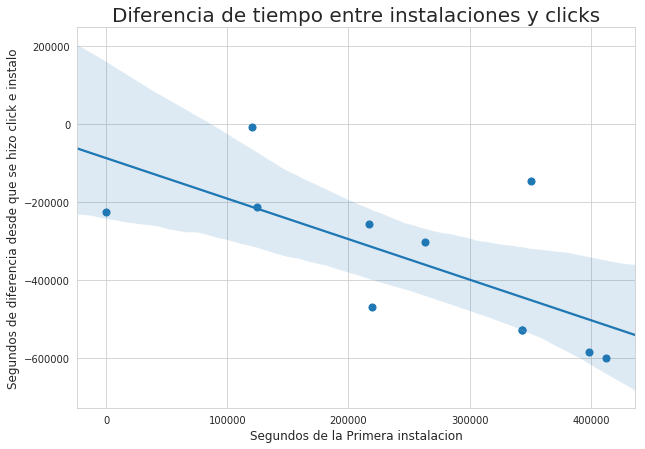

In [31]:
plt.figure(figsize=(10, 7))
sns.set_style("whitegrid")
diff_time_installs = sns.regplot(x="seconds_created_clicks", y="seconds_diff", x_estimator=np.mean, 
                  data=merge_clicks_installs)
diff_time_installs.set_title("Diferencia de tiempo entre instalaciones y clicks", fontsize =20)
diff_time_installs.set_xlabel("Segundos de la Primera instalacion", fontsize = 12)
diff_time_installs.set_ylabel("Segundos de diferencia desde que se hizo click e instalo", fontsize = 12)
plt.savefig('image/installs_clicks_line_time_diff.png', bbox_inches = 'tight', pad_inches = 0.1)
plt.show()